# Differential gene expression analysis

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

C:\Users\raj15\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Microarray data

In [2]:
expression = pd.read_csv('expression_data.csv')
print('Expression File Contains')
print(expression.head())
print(expression.info())
annotation = pd.read_csv('annotation_file.csv')
print('\n\nAnnotation File Contains')
print(annotation.head())


Expression File Contains
         ID_REF  Control_1  Control_2  Control_3  Control_4  Treated_1  \
0     1007_s_at     1752.5      986.7     1398.1     1107.1     1539.2   
1        121_at      810.1      496.3      228.7      619.1      441.9   
2       1316_at      958.5      918.9      531.2     1314.2     1113.7   
3  1552257_a_at      517.1      691.2      375.6      563.8      216.4   
4  1552264_a_at     1471.4     1408.7     1334.7     1923.2     1451.9   

   Treated_2  Treated_3  Treated_4  
0     1605.3     4663.0     1995.4  
1      427.1      324.9      242.6  
2      769.2     1182.8      974.8  
3      260.1      446.2      291.4  
4     1866.6      823.1     1367.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16525 entries, 0 to 16524
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_REF     16525 non-null  object 
 1   Control_1  16525 non-null  float64
 2   Control_2  16525 non-null  float64


## Quality Checking

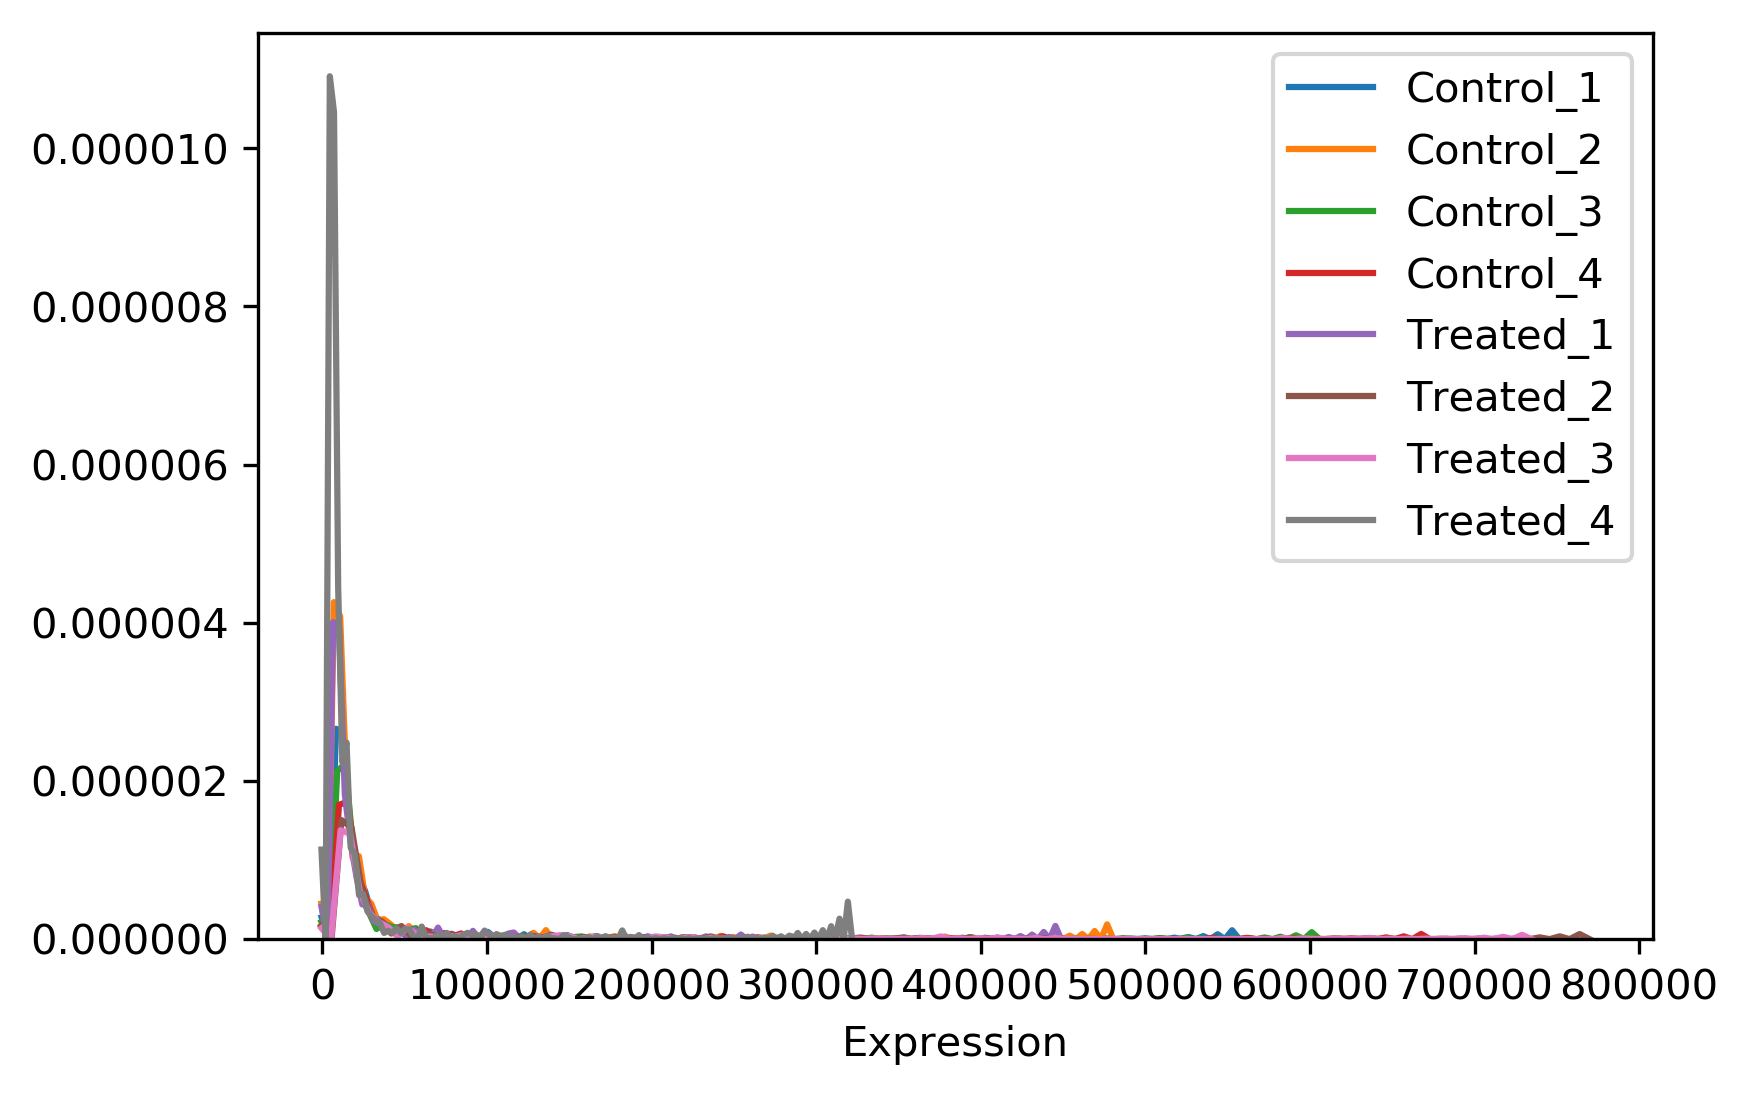

In [3]:
for i in expression.columns[1:]:
    
    sns.distplot(expression[i], hist=False,label=i,axlabel ='Expression')

Text(0, 0.5, 'Expression')

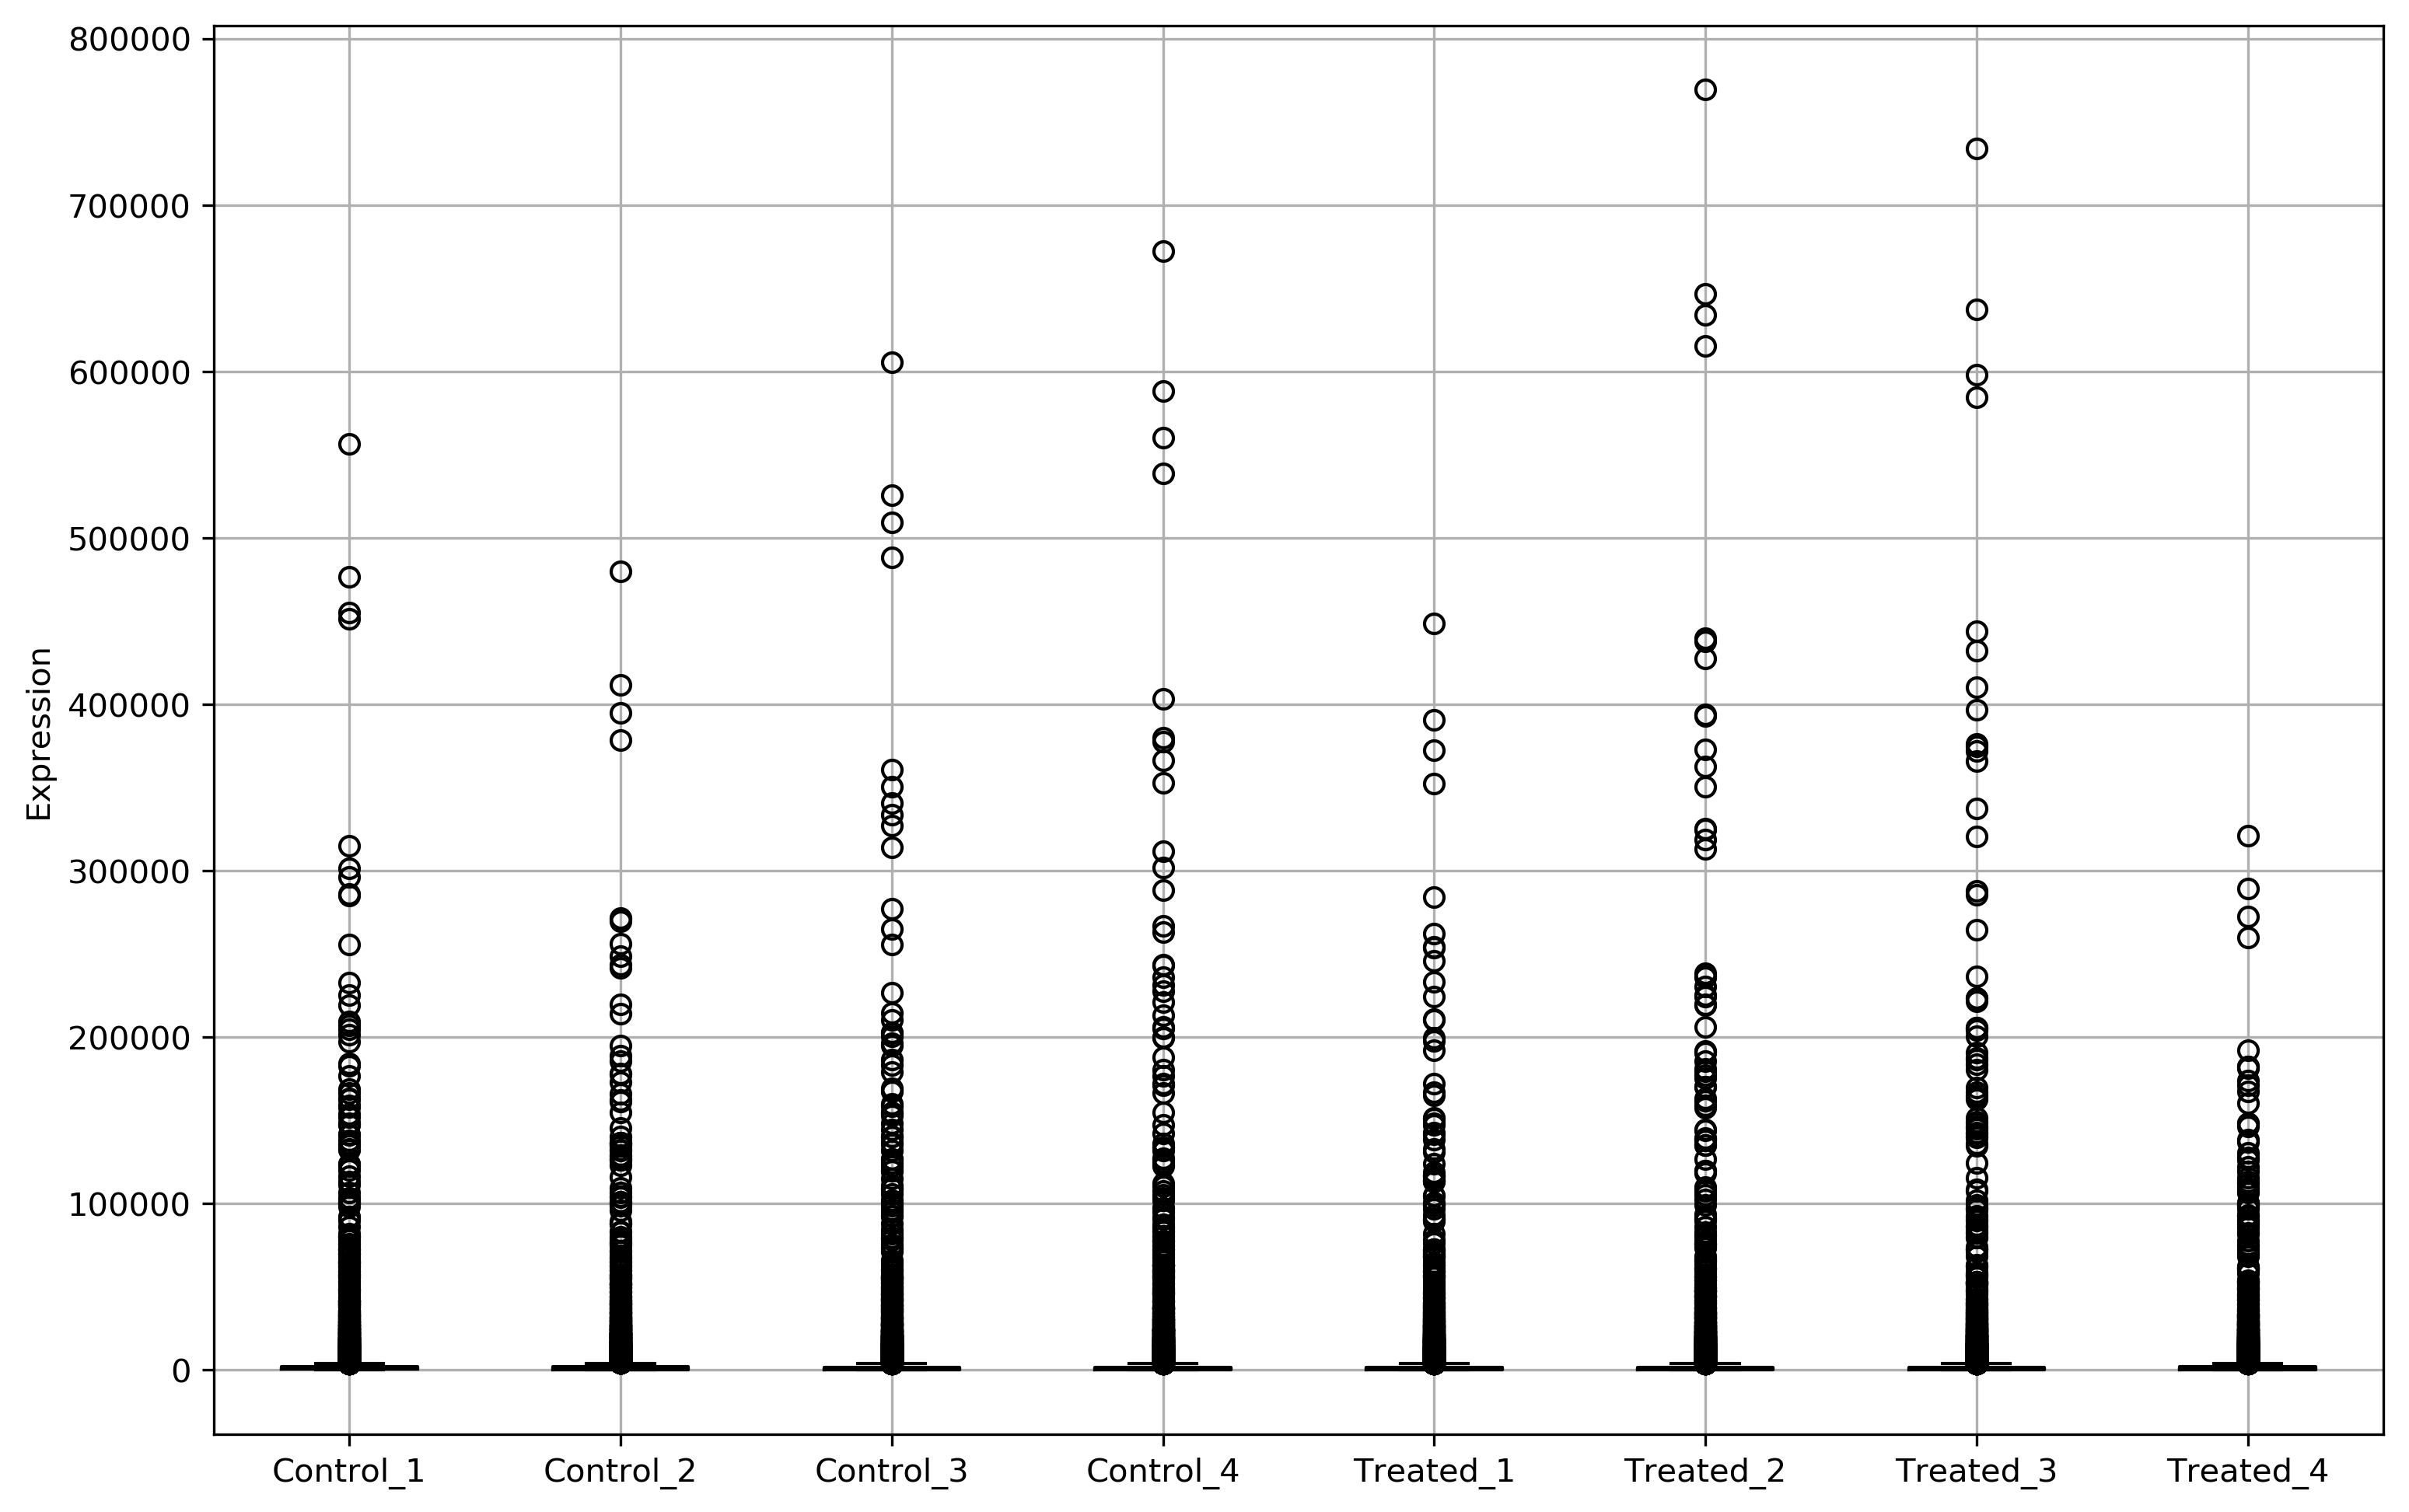

In [11]:

fig, axes = plt.subplots(figsize=(12,8))

ax = expression.boxplot(color='k',ax=axes)
ax.set_ylabel("Expression")

## Log2 Transformation

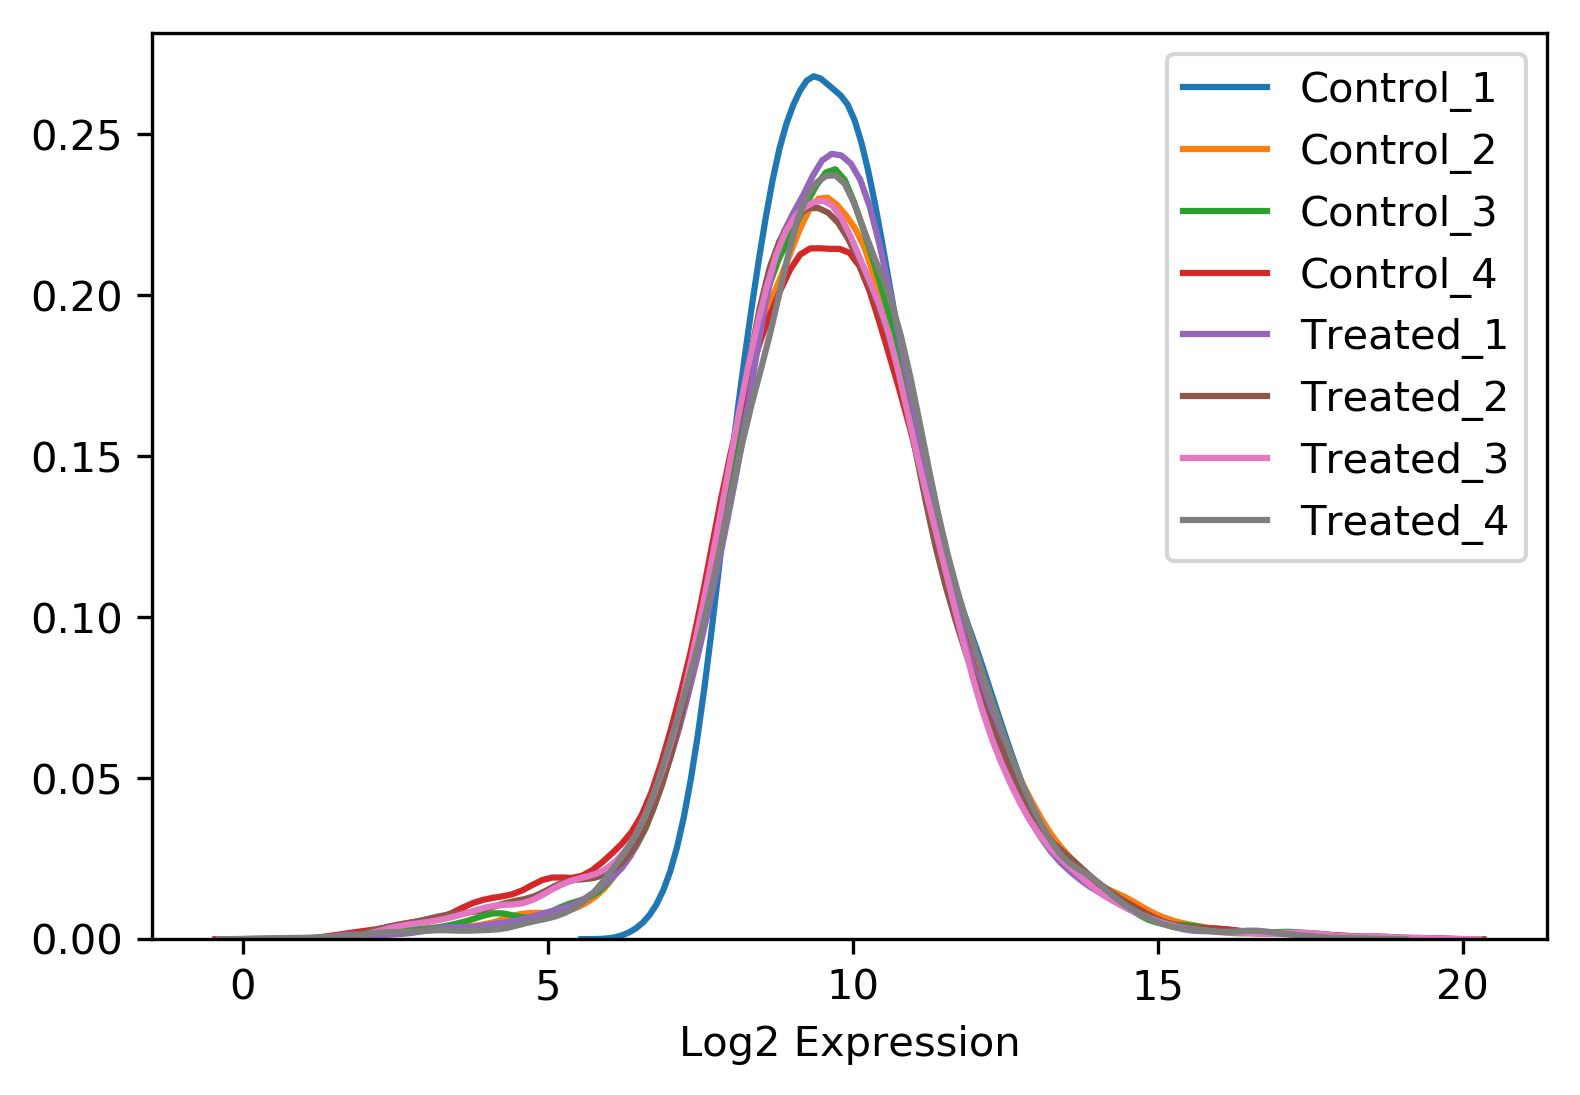

In [13]:
log_expression = np.log2(expression.iloc[:,1:])
for i in log_expression.columns:
    
    sns.distplot(log_expression[i], hist=False,label=i,axlabel ='Log2 Expression')

Text(0, 0.5, 'Log2 Expression')

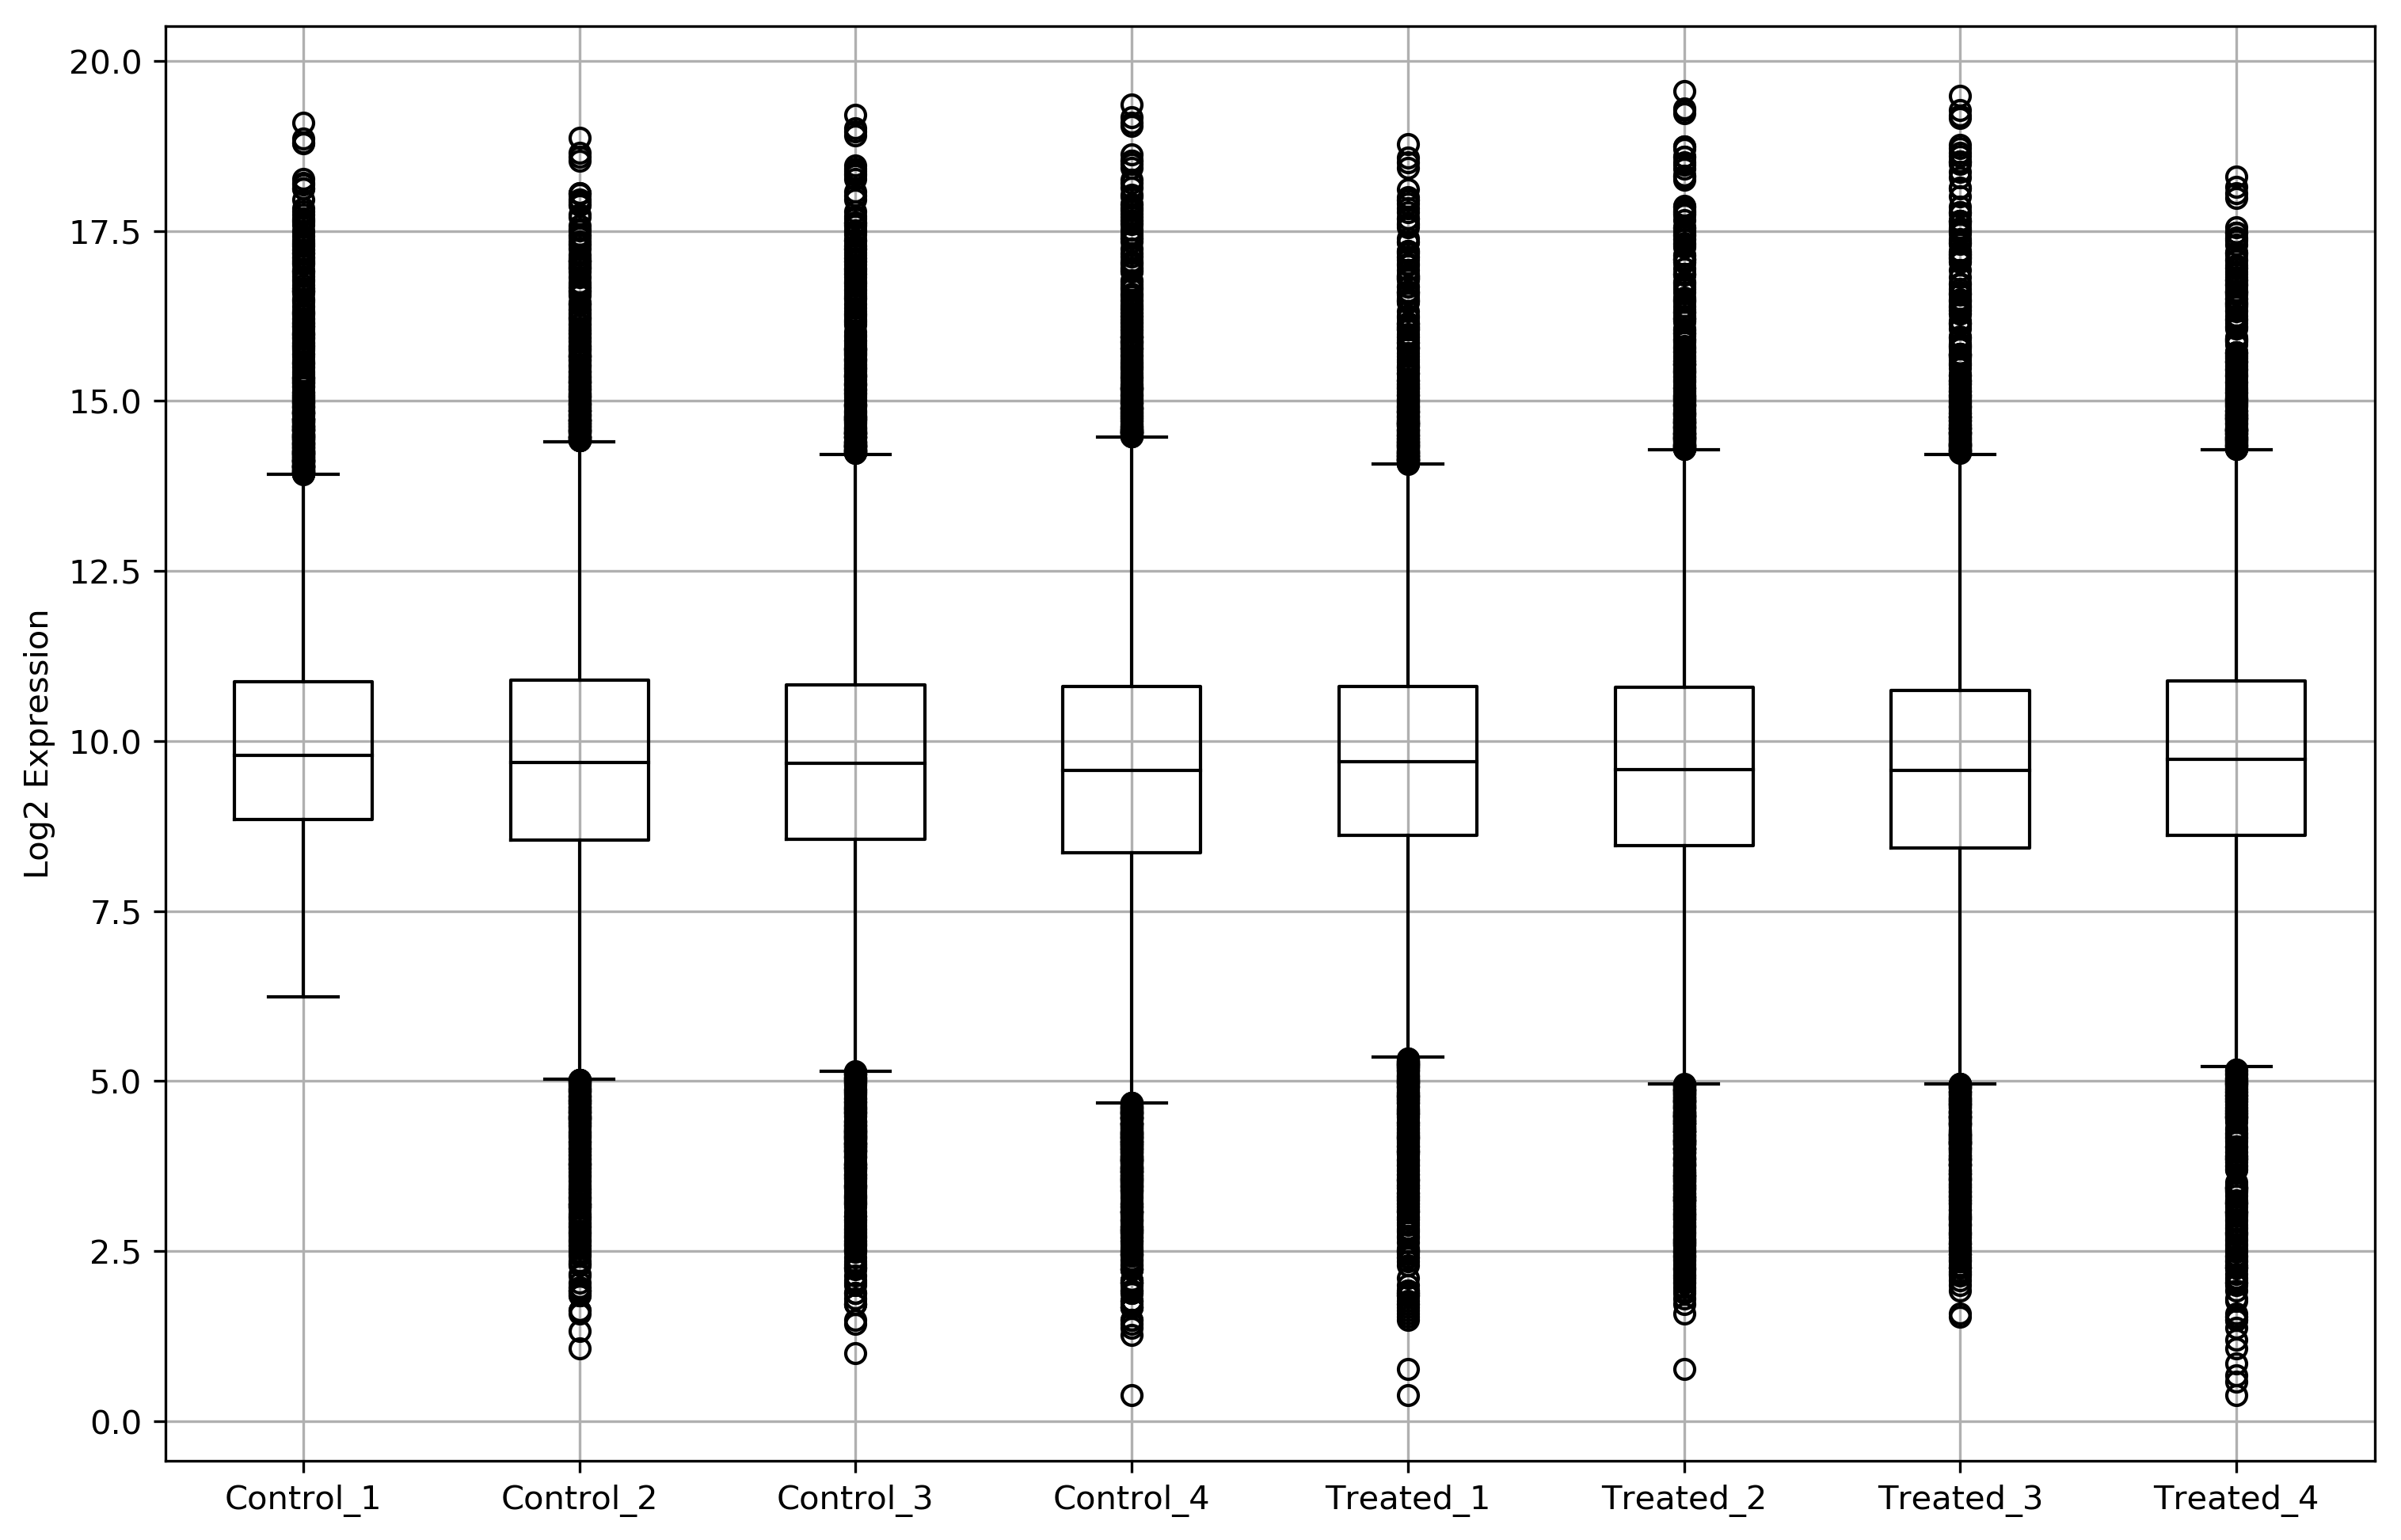

In [15]:

fig, axes = plt.subplots(figsize=(12,8))

ax = log_expression.boxplot(color='k')
ax.set_ylabel("Log2 Expression")

## Quantil Normalize

In [16]:
def quantileNormalize(input):
    temp = input.copy()
    #compute rank
    dic = {}
    for col in temp:
        dic.update({col : sorted(temp[col])})
    sorted_df = pd.DataFrame(dic)
    rank = sorted_df.mean(axis = 1).tolist()
    #sort
    for col in temp:
        t = np.searchsorted(np.sort(temp[col]), temp[col])
        temp[col] = [rank[i] for i in t]
    return temp

Norm_samples=quantileNormalize(expression.iloc[:,1:])
Norm_samples


Control_1    Control_2    Control_3    Control_4    Treated_1  \
0        1690.3250     957.6500    1399.3875    1148.4500    1567.7625   
1         736.6500     492.1250     231.0500     673.5125     426.2500   
2         884.4500     896.8250     530.5125    1360.4500    1106.2500   
3         435.7000     678.8625     377.1500     616.9625     210.9375   
4        1416.9500    1365.9875    1340.7375    1956.2125    1469.4875   
...            ...          ...          ...          ...          ...   
16520  338827.9375  338827.9375  338827.9375  338827.9375  300324.4625   
16521  300324.4625  284672.4500  319862.6500  319862.6500  272576.7750   
16522  573472.2375  573472.2375  573472.2375  573472.2375  573472.2375   
16523  458600.5000  458600.5000  458600.5000  458600.5000  458600.5000   
16524      69.5000      73.7750      15.5000      63.9625      80.4125   

         Treated_2    Treated_3    Treated_4  
0        1657.0000    5001.5625    1915.5625  
1         459.1875     356.2875     239.6375  
2         814.8250    1246.3750     935.1875  
3         284.3875     483.1625     286.4875  
4        1924.3625     881.1000    1299.6375  
...            ...          ...          ...  
16520  338827.9375  319862.6500  319862.6500  
16521  308535.5750  300324.4625  272576.7750  
16522  573472.2375  573472.2375  573472.2375  
16523  458600.5000  458600.5000  458600.5000  
16524      72.6500     105.5750      24.3750  

[16525 rows x 8 columns]

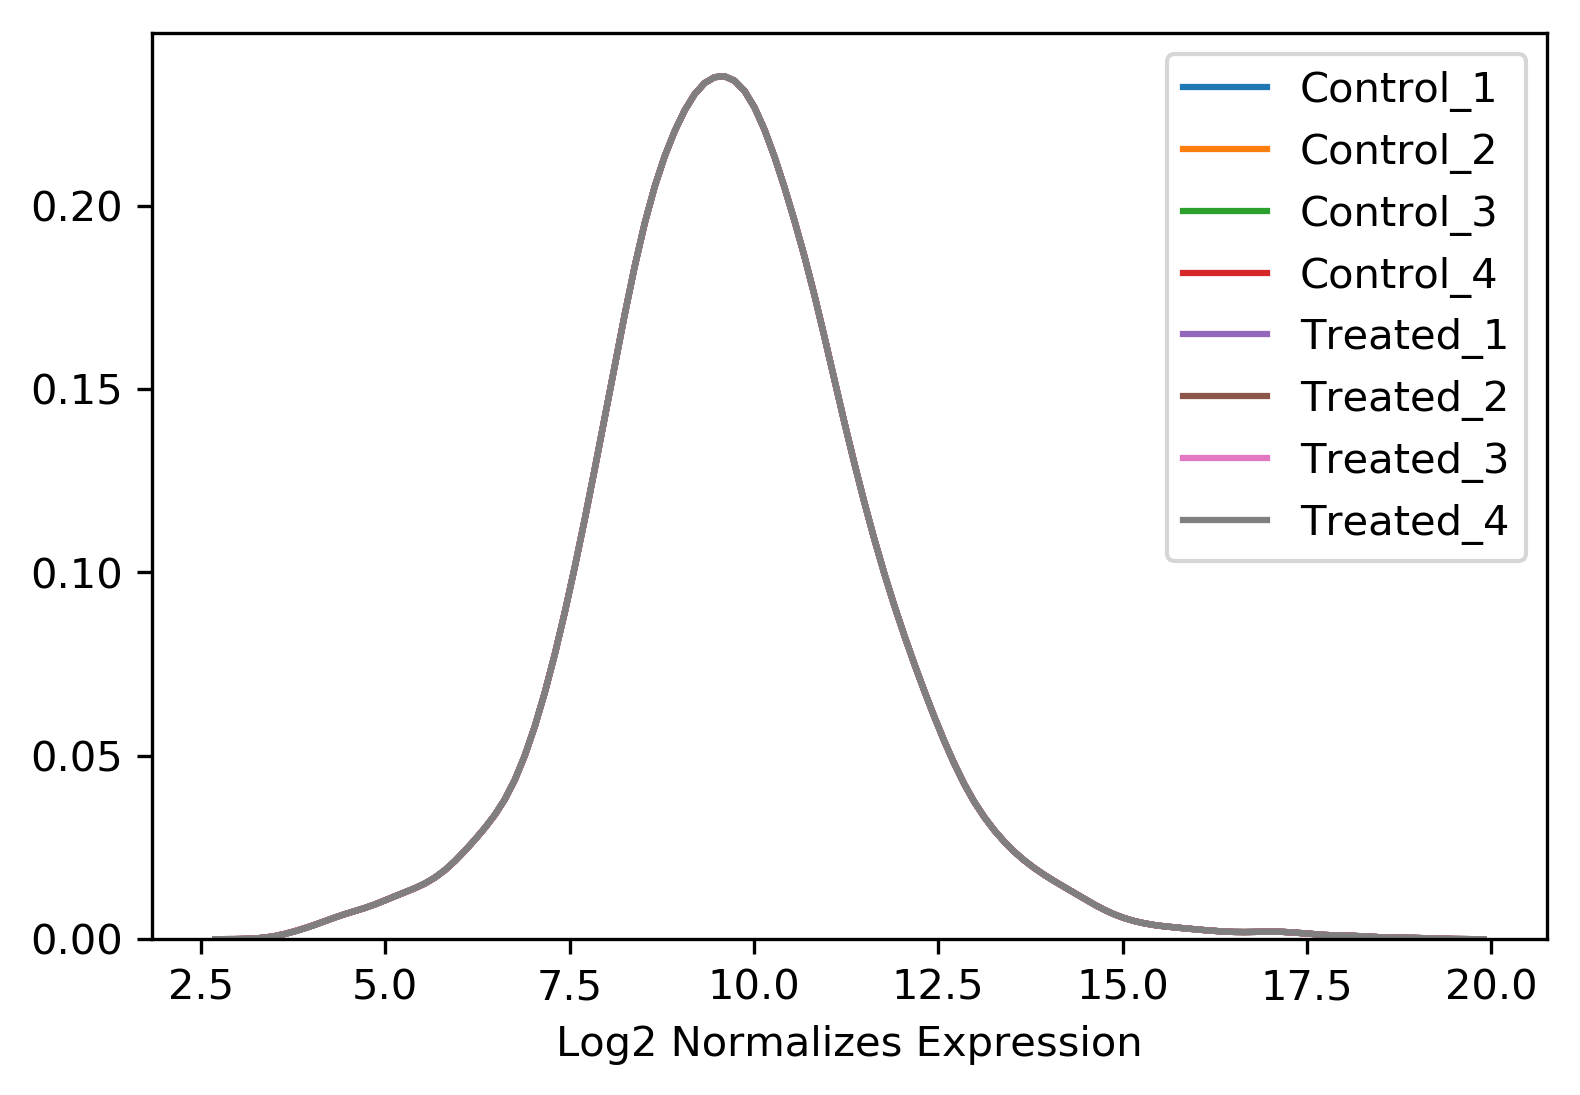

In [21]:
log_norm_expression = np.log2(Norm_samples)
for i in log_norm_expression.columns:
    
    sns.distplot(log_norm_expression[i], hist=False,label=i
                 ,axlabel ='Log2 Normalizes Expression')

Text(0, 0.5, 'Log2 Normalizes Expression')

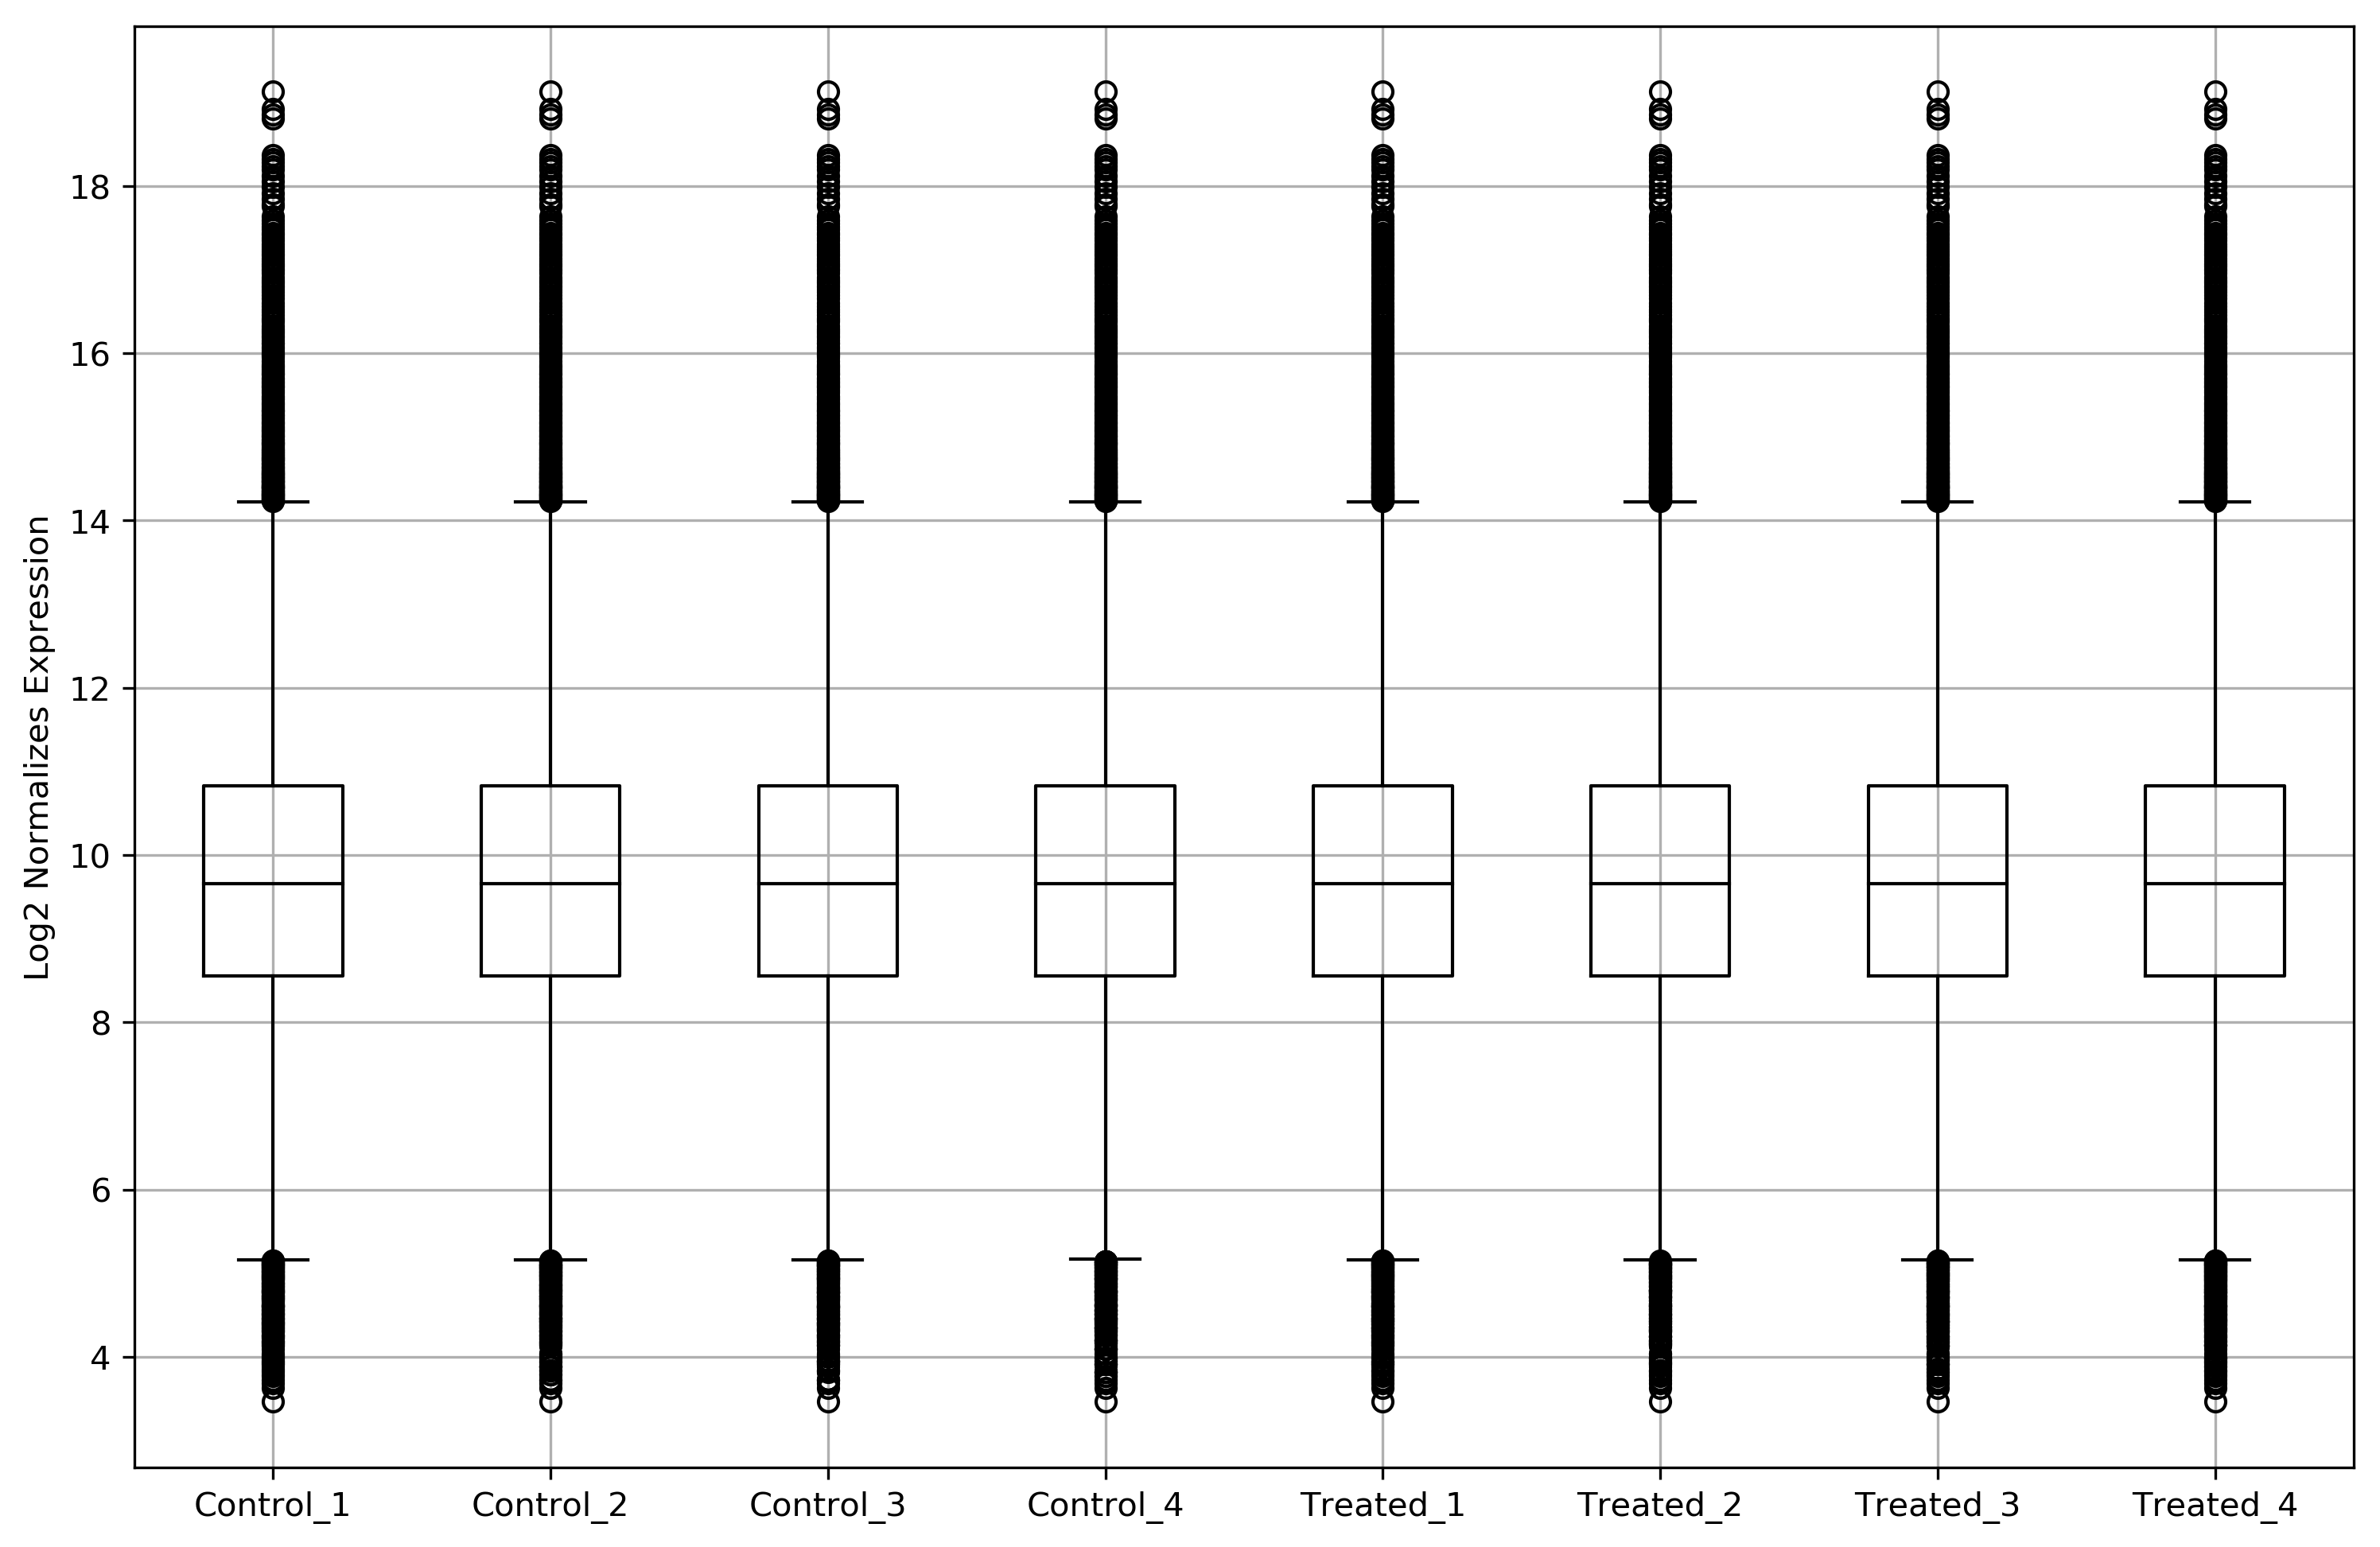

In [25]:
fig, axes = plt.subplots(figsize=(12,8))

ax = log_norm_expression.boxplot(color='k')
ax.set_ylabel('Log2 Normalizes Expression')

## Expression analysis


In [10]:
expression_transpose = log_norm_expression.T
expression_transpose.info()
expression_transpose.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Control_1 to Treated_4
Columns: 16525 entries, 0 to 16524
dtypes: float64(16525)
memory usage: 1.0+ MB


0         1          2         3          4         5      \
Control_1  10.723085  9.524836   9.788637  8.767191  10.468573  8.263621   
Control_2   9.903355  8.942881   9.808683  9.406976  10.415729  8.187723   
Control_3  10.450580  7.852061   9.051243  8.558995  10.388811  8.257977   
Control_4  10.165472  9.395561  10.409868  9.269039  10.933847  9.161478   
Treated_1  10.614491  8.735556  10.111462  7.720672  10.521097  9.742730   

               6         7         8          9      ...      16515  \
Control_1   9.025659  9.553869  6.403225  10.918863  ...  15.319744   
Control_2   9.523390  8.288001  8.408011  10.262359  ...  14.908644   
Control_3   8.407162  8.923959  9.059987  10.705935  ...  15.424084   
Control_4  10.654714  8.357442  8.972908   9.131568  ...  15.613680   
Treated_1  10.074610  8.486081  8.186548   9.689845  ...  15.186129   

               16516      16517      16518      16519      16520      16521  \
Control_1  15.119303  15.219493  16.400238  16.424173  18.370193  18.196162   
Control_2  14.987716  15.075847  16.323480  16.292412  18.370193  18.118943   
Control_3  15.606708  15.595671  16.696069  16.602807  18.370193  18.287093   
Control_4  15.760358  15.743399  16.904966  16.880388  18.370193  18.287093   
Treated_1  15.251928  15.319744  14.816864  14.792094  18.196162  18.056303   

               16522      16523     16524  
Control_1  19.129364  18.806878  6.118941  
Control_2  19.129364  18.806878  6.205060  
Control_3  19.129364  18.806878  3.954196  
Control_4  19.129364  18.806878  5.999154  
Treated_1  19.129364  18.806878  6.329348  

[5 rows x 16525 columns]

## Standardization 




In [11]:
expression_transpose_std = (expression_transpose-expression_transpose.mean()
                           )/expression_transpose.std()
expression_transpose_std = expression_transpose_std.replace(
    [np.inf, -np.inf], np.nan)
expression_transpose_std = expression_transpose_std.dropna(axis=1)



## PCA

In [12]:
sklearn_pca = PCA(n_components=2)

print(expression_transpose_std.shape)

PCs = sklearn_pca.fit_transform(expression_transpose)
print(PCs.shape)
print(sklearn_pca.explained_variance_ratio_)

(8, 16523)
(8, 2)
[0.20351873 0.18757078]


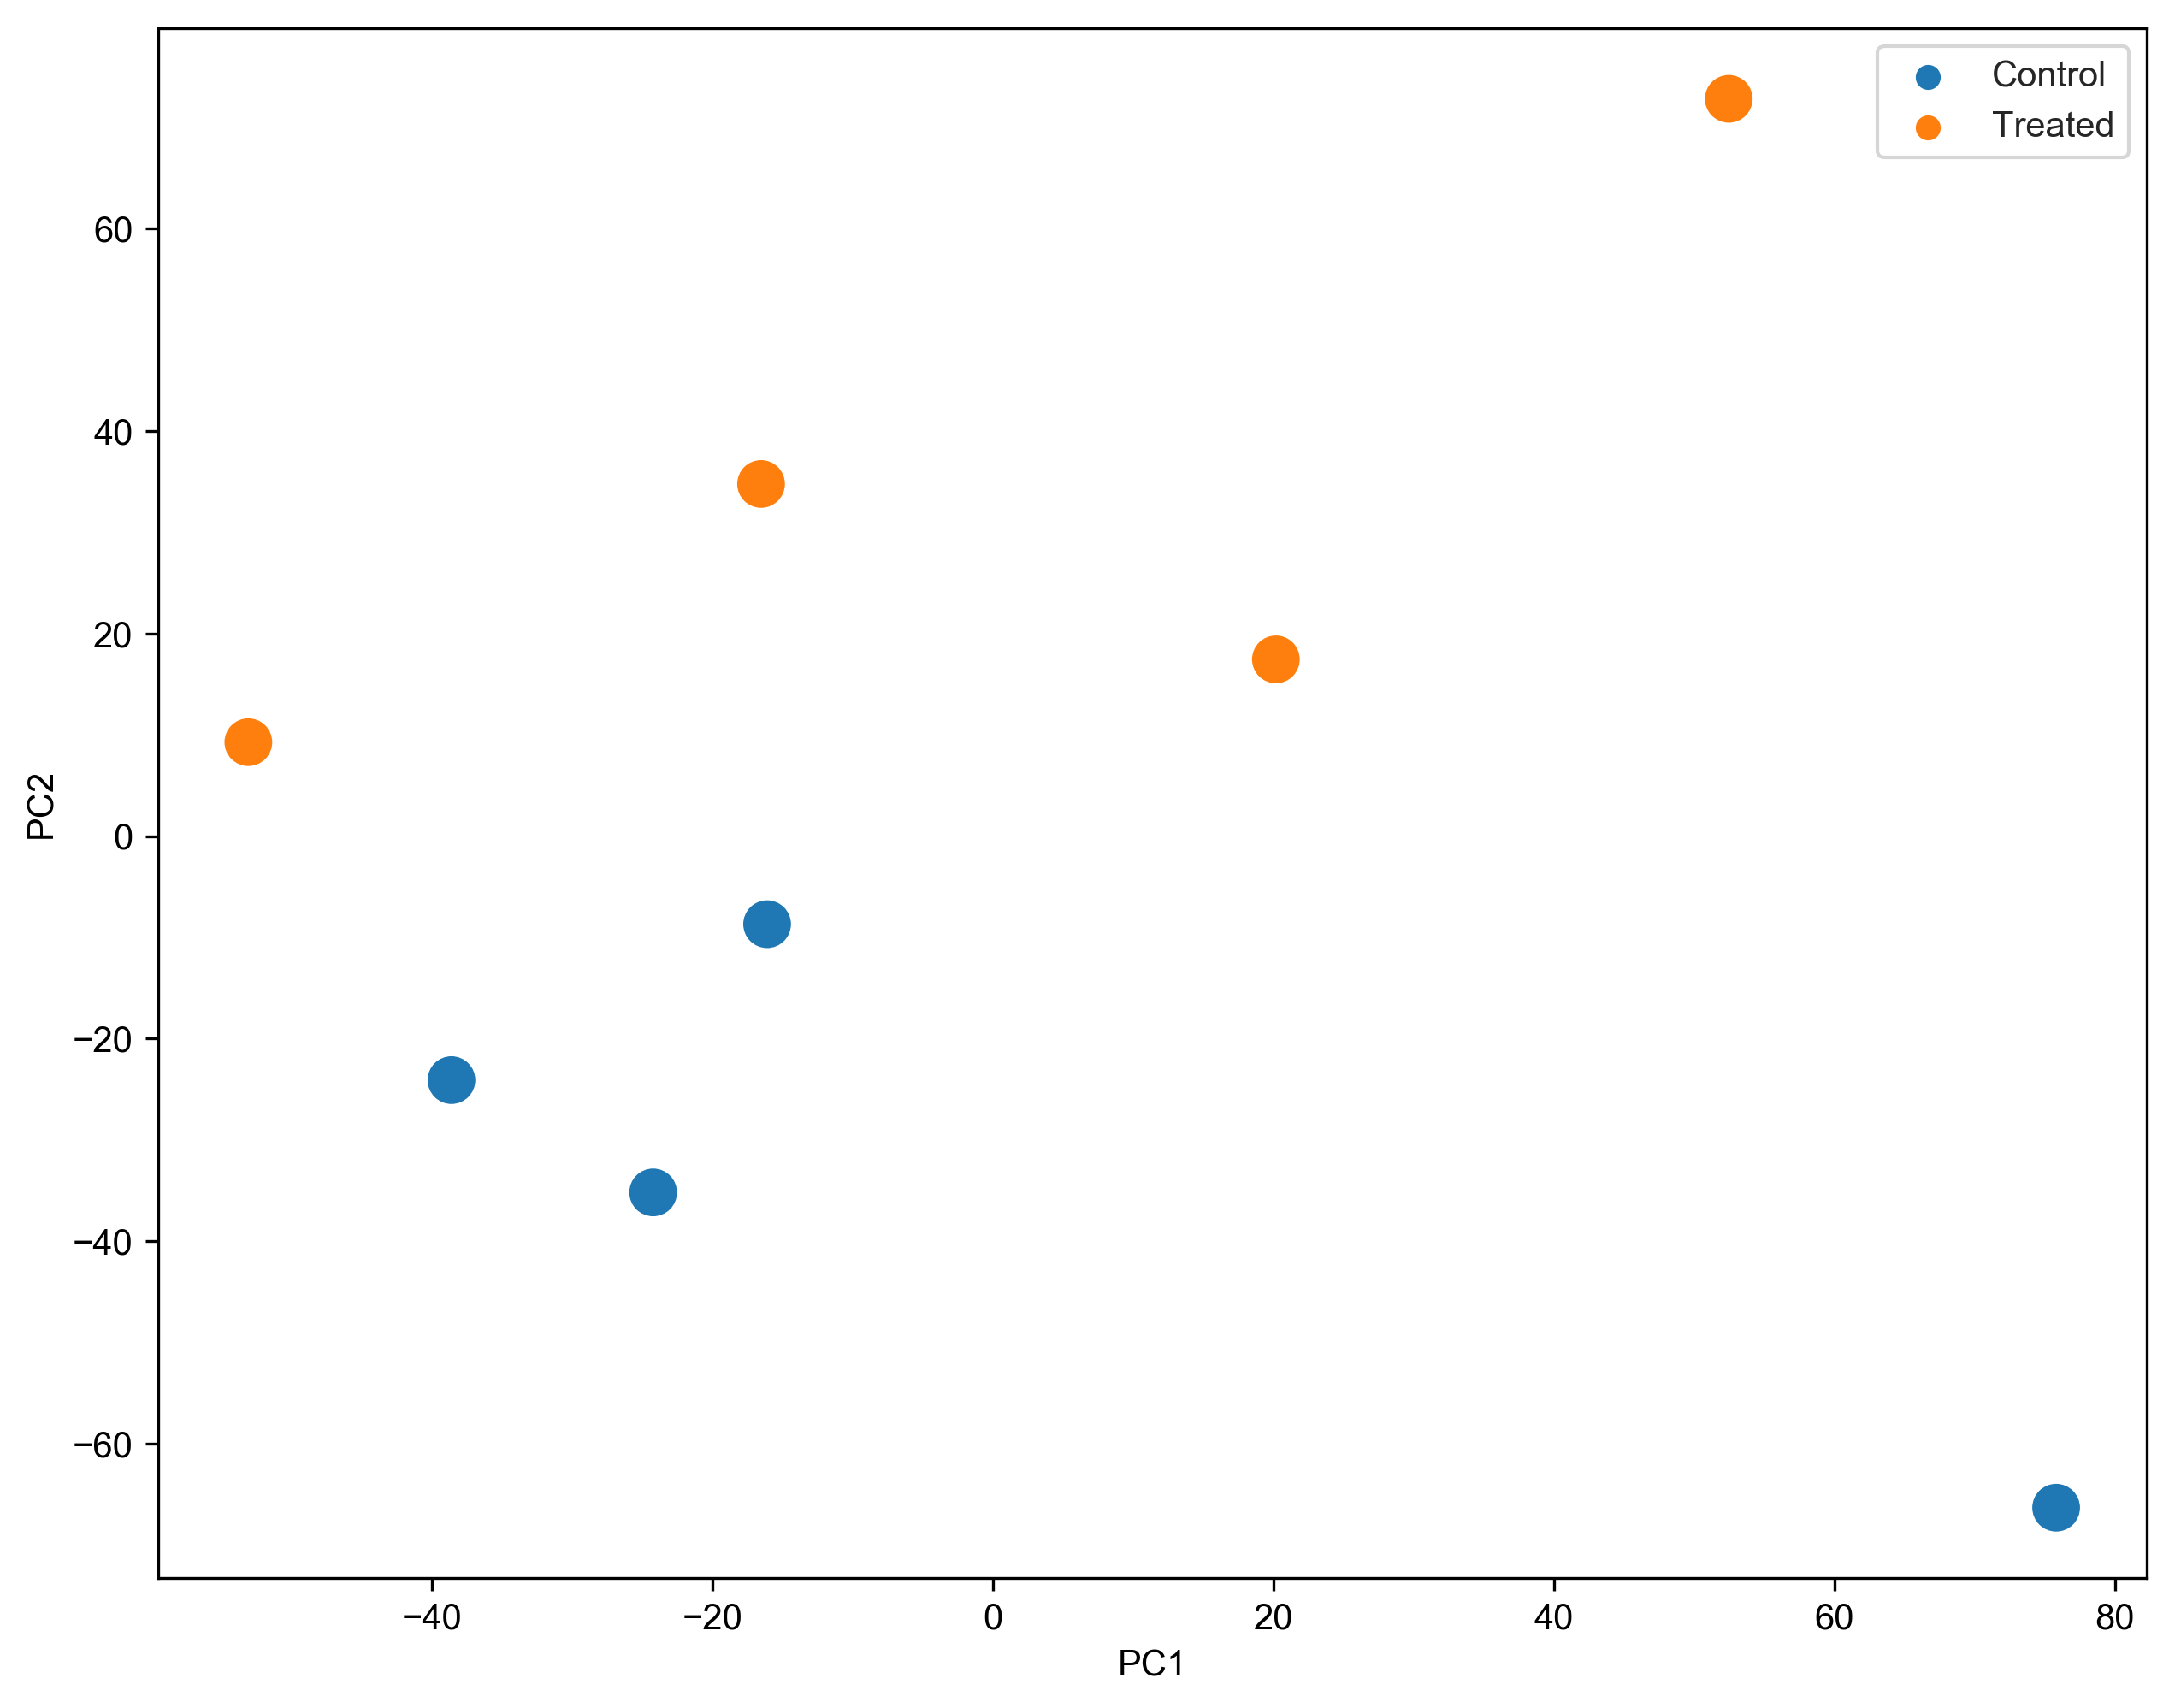

In [13]:
expression_PCs = pd.DataFrame(PCs,columns=['PC1','PC2'])
expression_PC1 = expression_PCs.set_index(
    np.array((['Control']*4)+['Treated']*4))
expression_PC2 = expression_PCs.set_index(expression_transpose.index)
fig, axes = plt.subplots(figsize=(10,8))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1',y='PC2',data = expression_PC2,
                hue =expression_PC1.index, s=200)


## T-Test

In [14]:
from scipy import stats
control_mean = log_norm_expression.iloc[:,:4].mean(axis=1)
treated_mean = log_norm_expression.iloc[:,4:].mean(axis=1)

compair_means=pd.DataFrame(columns=['Control_Mean','Treated_mean'])
compair_means['Control_Mean']=control_mean
compair_means['Treated_mean']=treated_mean
compair_means['log2_fold_change'] = (compair_means['Treated_mean']-
                                     compair_means['Control_Mean'])
                                     

t_tset_values = pd.DataFrame(stats.ttest_ind(
    log_norm_expression.iloc[:,:4],log_norm_expression.iloc[:,4:],axis=1)).T

t_tset_values.columns = ['Stastics','Pvalue']

compair_means = pd.concat([expression.iloc[:,0],compair_means,t_tset_values],axis=1)
compair_means.head()


C:\Users\raj15\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\raj15\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\raj15\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


ID_REF  Control_Mean  Treated_mean  log2_fold_change  Stastics  \
0     1007_s_at     10.310623     11.125141          0.814518 -1.891712   
1        121_at      8.928835      8.490026         -0.438809  1.011076   
2       1316_at      9.764608      9.983611          0.219003 -0.708891   
3  1552257_a_at      9.000550      8.237770         -0.762780  2.384782   
4  1552264_a_at     10.551740     10.389579         -0.162161  0.607118   

     Pvalue  
0  0.107397  
1  0.351002  
2  0.504990  
3  0.054412  
4  0.566024

In [15]:
merged_table = pd.merge(annotation,compair_means,on='ID_REF')
merged_table.head()



ID_REF     GB_ACC       Gene Symbol     ENTREZ_GENE_ID  Control_Mean  \
0     1007_s_at     U48705  DDR1 /// MIR4640  780 /// 100616237     10.310623   
1        121_at     X69699              PAX8               7849      8.928835   
2       1316_at     X55005              THRA               7067      9.764608   
3  1552257_a_at  NM_015140            TTLL12              23170      9.000550   
4  1552264_a_at  NM_138957             MAPK1               5594     10.551740   

   Treated_mean  log2_fold_change  Stastics    Pvalue  
0     11.125141          0.814518 -1.891712  0.107397  
1      8.490026         -0.438809  1.011076  0.351002  
2      9.983611          0.219003 -0.708891  0.504990  
3      8.237770         -0.762780  2.384782  0.054412  
4     10.389579         -0.162161  0.607118  0.566024

## Selecting Significat genes (P<0.05 and log2 Fold change >1.5)

In [16]:
significant_table = merged_table[merged_table['Pvalue']<0.05]
significant_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 23 to 16496
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_REF            1251 non-null   object 
 1   GB_ACC            1250 non-null   object 
 2   Gene Symbol       1119 non-null   object 
 3   ENTREZ_GENE_ID    1100 non-null   object 
 4   Control_Mean      1251 non-null   float64
 5   Treated_mean      1251 non-null   float64
 6   log2_fold_change  1251 non-null   float64
 7   Stastics          1251 non-null   float64
 8   Pvalue            1251 non-null   float64
dtypes: float64(5), object(4)
memory usage: 97.7+ KB


## Differentially Expressed Genes


In [17]:
Upregulated_genes = significant_table[
    significant_table['log2_fold_change']>1.5]
Downregulated_genes = significant_table[
    significant_table['log2_fold_change']<-1.5]
print('Upregulated Genes')
Upregulated_genes.info()
print('\nDownregulated Genes')
Downregulated_genes.info()

Upregulated Genes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 136 to 16178
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_REF            69 non-null     object 
 1   GB_ACC            69 non-null     object 
 2   Gene Symbol       47 non-null     object 
 3   ENTREZ_GENE_ID    46 non-null     object 
 4   Control_Mean      69 non-null     float64
 5   Treated_mean      69 non-null     float64
 6   log2_fold_change  69 non-null     float64
 7   Stastics          69 non-null     float64
 8   Pvalue            69 non-null     float64
dtypes: float64(5), object(4)
memory usage: 5.4+ KB

Downregulated Genes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 71 to 16262
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_REF            63 non-null     object 
 1   GB_ACC            63 non-null    

In [18]:
DEGs = pd.concat([Upregulated_genes,Downregulated_genes])
DEGs.head()

ID_REF     GB_ACC Gene Symbol ENTREZ_GENE_ID  Control_Mean  \
136    1553253_at  NM_080863       ASB16          92591      7.767619   
235    1553954_at   BU682208       ALG14         199857      6.503933   
259  1554043_a_at   BC012528         NaN            NaN      6.857222   
381    1554772_at   BC036407     EFCAB13         124989      8.644272   
425    1555118_at   BC029869      ENTPD3            956      5.923432   

     Treated_mean  log2_fold_change  Stastics    Pvalue  
136      9.307180          1.539562 -3.317525  0.016054  
235      8.086674          1.582741 -2.476600  0.048026  
259      8.667420          1.810198 -2.667561  0.037147  
381     10.226655          1.582383 -2.905322  0.027145  
425      7.722591          1.799159 -3.371086  0.015022

## Heatmap

In [19]:
log_expression=pd.concat([expression.iloc[:,0],log_expression],axis=1)
table = pd.merge(DEGs.iloc[:,:3],log_expression,on='ID_REF')
index = table.iloc[:,1]
table = table.iloc[:,3:].set_index(index)
table.head()

Control_1  Control_2  Control_3  Control_4  Treated_1  Treated_2  \
GB_ACC                                                                        
NM_080863   8.163398   7.315602   7.305606   8.657140   9.642052   8.896332   
BU682208    7.779391   7.172927   3.944858   6.507795   7.837943   8.327777   
BC012528    8.587215   7.062856   6.277985   4.336283   8.104861   8.756223   
BC036407    8.820179   9.316734   9.170426   7.210428   9.704077  10.421329   
BC029869    7.830990   4.209453   6.137504   4.078951   7.001127   7.326429   

           Treated_3  Treated_4  
GB_ACC                           
NM_080863   9.869440   8.719047  
BU682208    8.751544   7.235536  
BC012528    9.707532   7.955940  
BC036407   11.122569   9.643676  
BC029869    8.431289   7.835419

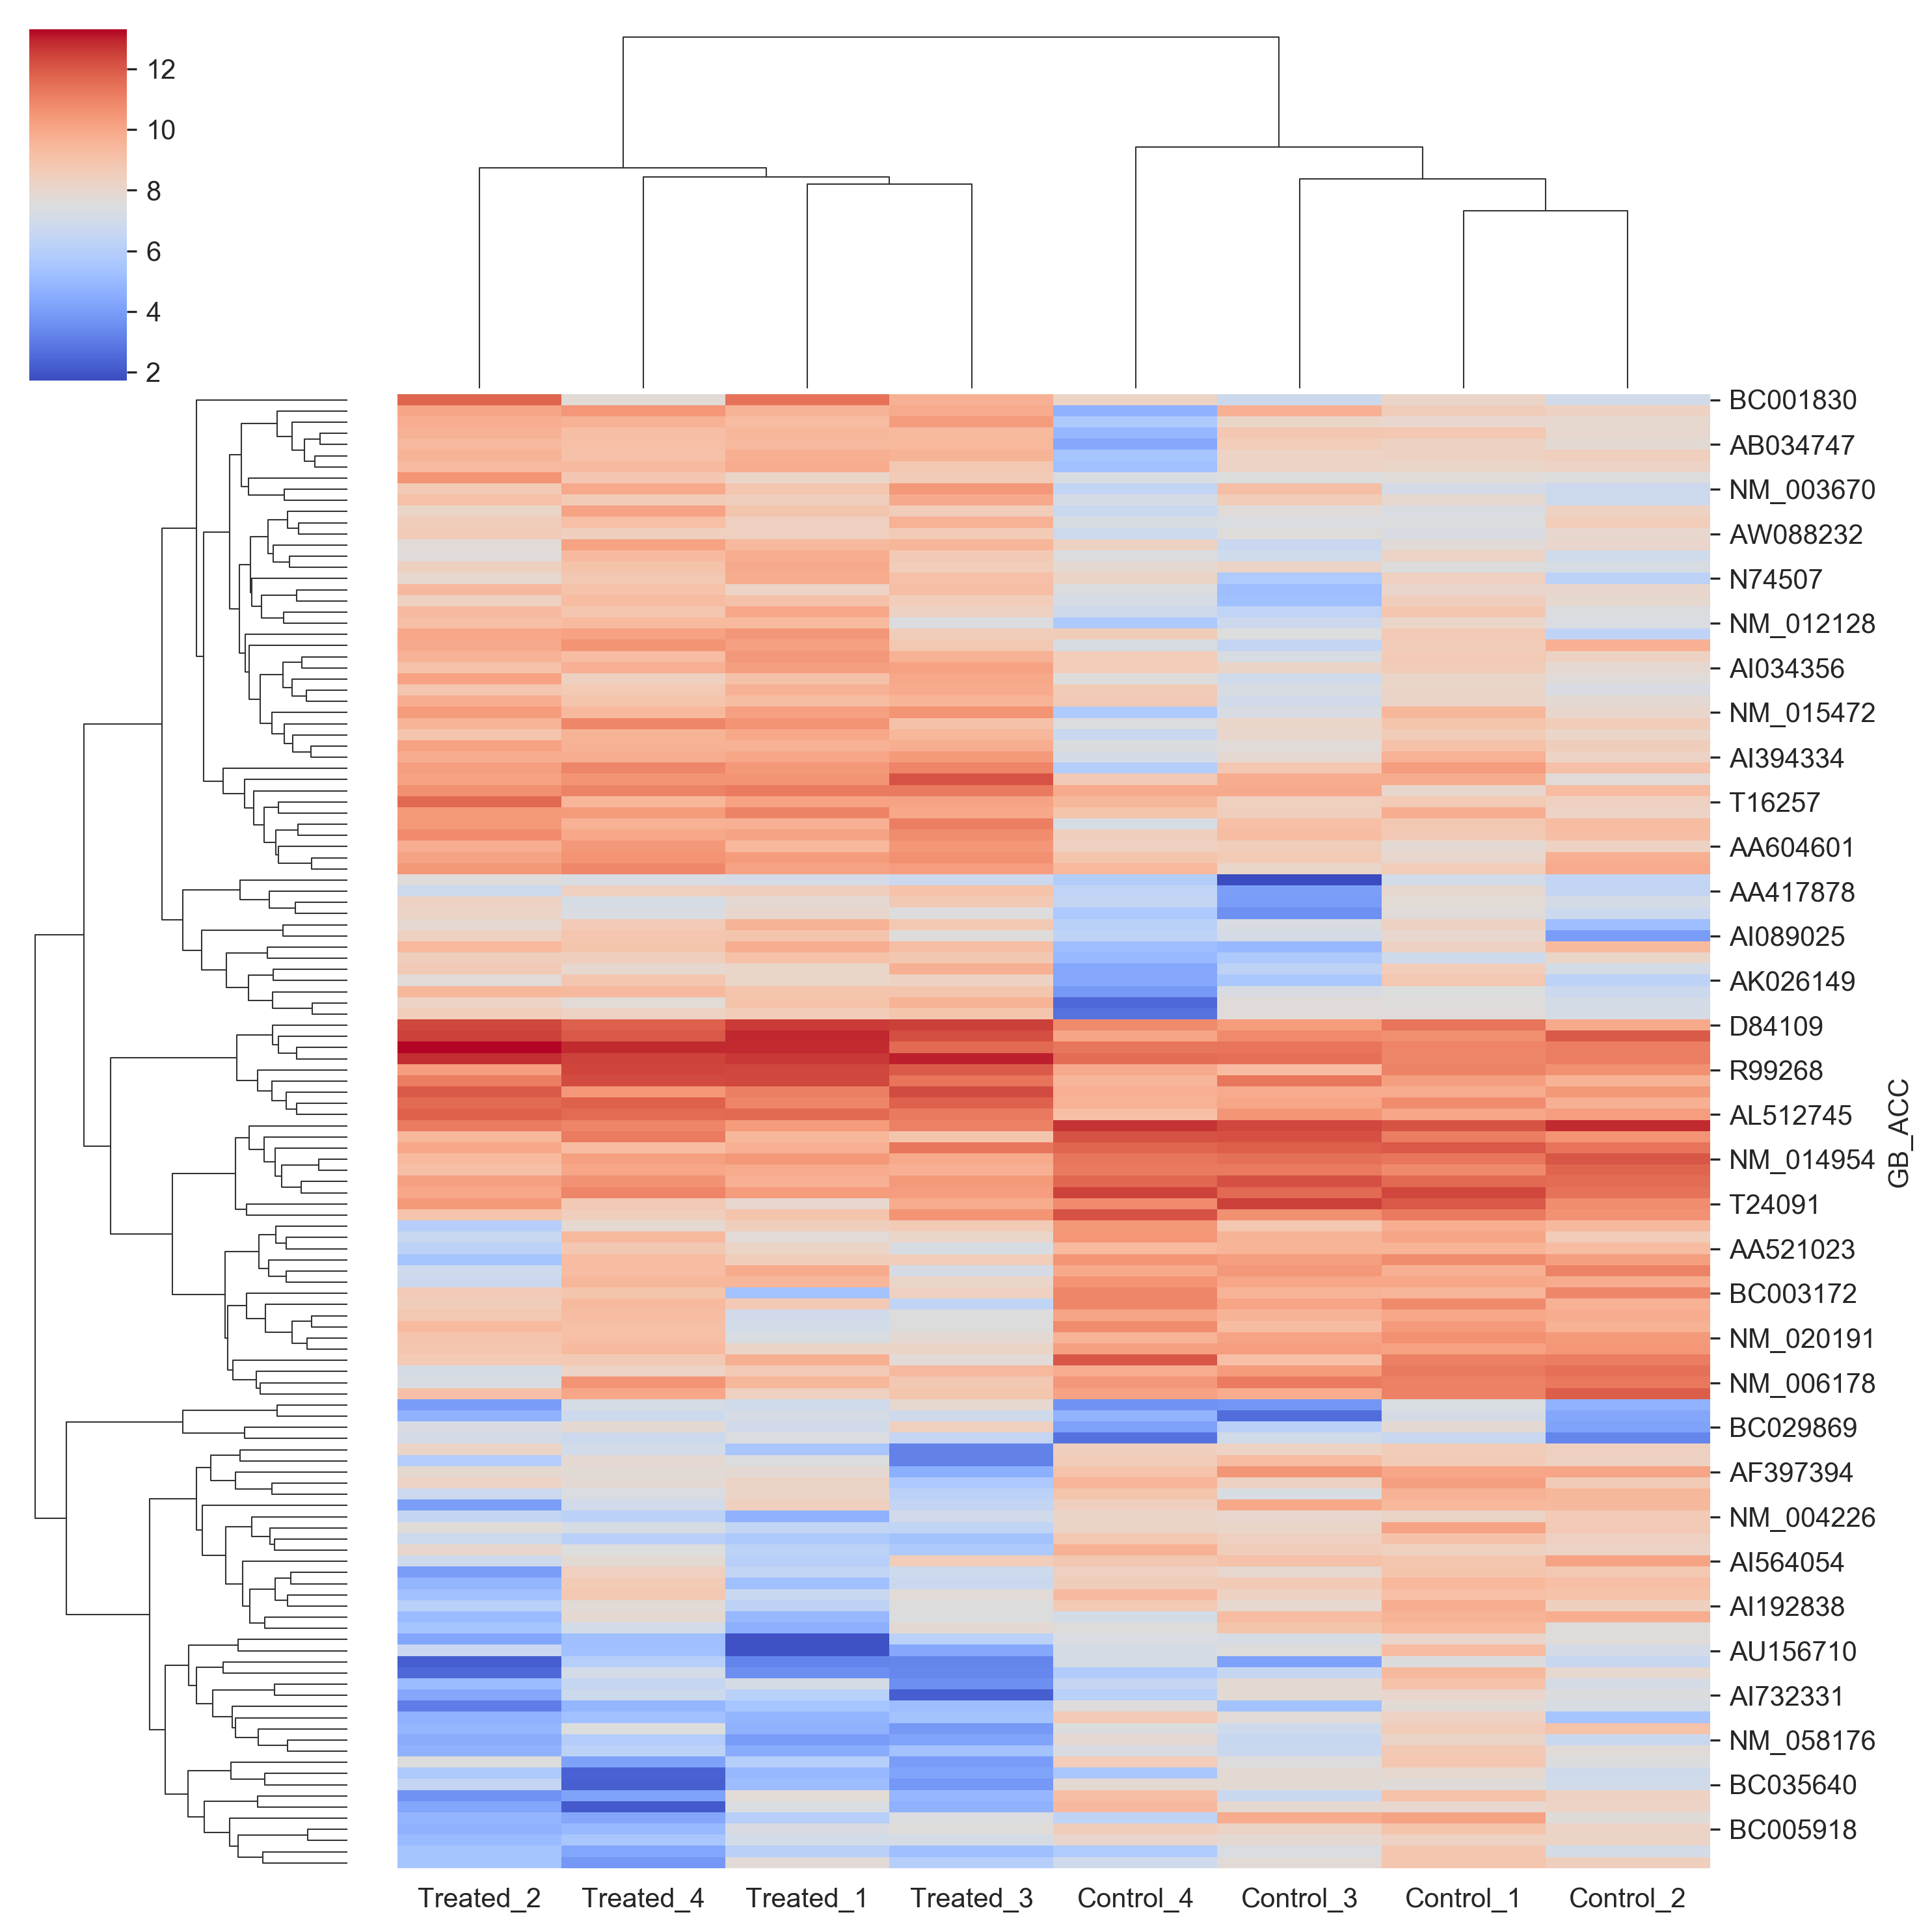

In [20]:
sns.clustermap(table,cmap='coolwarm')


## Differential gene expression analysis using gseapy

In [21]:
gene_list = DEGs['Gene Symbol'].dropna()
gene_list = gene_list.tolist()
print(gene_list)

['ASB16', 'ALG14', 'EFCAB13', 'ENTPD3', 'HIF3A', 'LOC441081', 'AK024134 /// PPM1H', 'HIVEP1', 'LLNLR-246C6.1', 'LITAF', 'BHLHE40', 'WWTR1', 'NAIP', 'ATF2', 'SLC14A1', 'FMO4', 'FOXD1', 'ID4', 'RBPMS', 'TGFB1I1', 'SPTSSA', 'GTF2H5', 'IFITM1', 'GPR37', 'CD44', 'TNS1', 'CLCA4', 'ENGASE', 'PER3', 'ZNF83', 'LOC101928524 /// PRPF18', 'MRVI1', 'TBX3', 'CP', 'ZNF595', 'SGCB', 'ZNF224', 'U2AF1', 'TUSC3', 'PAX6', 'STON2', 'QKI', 'LIX1', 'ARMC8', 'PCNX', 'ARHGEF40', 'RIT1', 'HDAC9', 'LINC00889', 'OLFM3', 'B4GALNT1', 'PABPC1L2A /// PABPC1L2B', 'BIN3', 'POM121L8P', 'EFHB', 'PEX13', 'ABHD1', 'LMO3', 'AP3B2', 'CCT4', 'RERE', 'TMEM189 /// TMEM189-UBE2V1 /// UBE2V1 /// UBE2V2', 'LOC101930324 /// NSF', 'DYRK2', 'FBLN1', 'GUCY1B3', 'MAPT', 'RGS4', 'EIF1AY', 'STK17B', 'RPH3A', 'SAC3D1', 'CRH', 'RIT2', 'LDHC', 'PTPRO', 'CELA3A', 'EEF1E1', 'KRAS', 'DOK5', 'SKAP2', 'PLAC8', 'MRPS22', 'ST6GALNAC5', 'SIRT3', 'LOC101927933 /// LRRC8C', 'SEMA6B', 'THAP2', 'CCAR2', 'COA6', 'CCDC71L', 'RAB3B', 'MYH11', 'PIANP', 'RA

In [22]:
import gseapy as gp

enr = gp.enrichr(gene_list=gene_list,
                 gene_sets=['GO_Biological_Process_2017b'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='test_name',
                 outdir='test/enrichr_kegg',
                 # no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )
enr.results[['Gene_set','Term','Overlap','P-value','Genes']].head()

2020-08-05 18:40:34,495 Warning: No enrich terms using library GO_Biological_Process_2017b when cutoff = 0.5


Gene_set  \
0  GO_Biological_Process_2017b   
1  GO_Biological_Process_2017b   
2  GO_Biological_Process_2017b   
3  GO_Biological_Process_2017b   
4  GO_Biological_Process_2017b   

                                                Term Overlap   P-value  \
0  modulation by organism of defense-related calc...     2/8  0.000763   
1  modulation by organism of defense-related calc...     2/8  0.000763   
2      ganglioside biosynthetic process (GO:0001574)    3/34  0.000768   
3  regulation of calcium-mediated signaling (GO:0...     2/9  0.000978   
4  regulation of CAMKK-AMPK signaling cascade (GO...     2/9  0.000978   

                        Genes  
0                   RIT2;MAPT  
1                   RIT2;MAPT  
2  B4GALNT1;SPTSSA;ST6GALNAC5  
3                   RIT2;MAPT  
4                   RIT2;MAPT

# SNP analysis

In [23]:
import pandas as pd
import seaborn as sns

## Loading genotype data

In [24]:
genotype = pd.read_csv('genotype.csv')
print(genotype.head())
genotype = genotype.rename(columns = {"# rsid":"ID"})
print(genotype.head())

C:\Users\raj15\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        # rsid chromosome  position genotype
0   rs12564807          1    734462       AA
1    rs3131972          1    752721       AG
2  rs148828841          1    760998       AC
3   rs12124819          1    776546       AA
4  rs115093905          1    787173       GG
            ID chromosome  position genotype
0   rs12564807          1    734462       AA
1    rs3131972          1    752721       AG
2  rs148828841          1    760998       AC
3   rs12124819          1    776546       AA
4  rs115093905          1    787173       GG


## Analysis

In [25]:
genotype["chromosome"].value_counts()

1     47742
2     46815
6     40965
3     39186
5     34900
4     34386
7     33552
8     30651
11    29883
10    29592
12    29068
9     27010
13    21882
16    19680
X     19588
17    19364
14    19002
15    18660
20    14730
18    14696
19    13948
22     9307
21     8571
MT     3287
Y      2129
18     1950
Name: chromosome, dtype: int64

# Pharmacogenomics Analysis

In [28]:
phenotype = pd.read_csv('phenotype.tsv',sep='\t')
phenotype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4561 non-null   int64 
 1   Clinical Annotation ID     4561 non-null   int64 
 2   Location                   4561 non-null   object
 3   Gene                       4334 non-null   object
 4   Level of Evidence          4561 non-null   object
 5   Clinical Annotation Types  4538 non-null   object
 6   Genotype-Phenotype IDs     4561 non-null   object
 7   Annotation Text            4561 non-null   object
 8   Variant Annotations IDs    4561 non-null   object
 9   Variant Annotations        4561 non-null   object
 10  PMIDs                      4561 non-null   object
 11  Evidence Count             4561 non-null   int64 
 12  Related Chemicals          4561 non-null   object
 13  Related Diseases           3633 non-null   object
 14  Biogeogr

In [29]:
pd.set_option('display.max_colwidth', 200)
phenotype = phenotype.rename(columns = {"Location":"ID"})
phenotype=pd.concat([phenotype['ID'],phenotype['Annotation Text'],
                     phenotype['Related Chemicals'],
                     phenotype['Related Diseases']],
                     axis=1)
phenotype.head()

ID  \
0   rs75527207   
1    rs4149056   
2  rs141033578   
3   rs78769542   
4    rs1799971   

                                                                                                                                                                                           Annotation Text  \
0  AA:Ivacaftor is indicated in cystic fibrosis patients with the AA genotype (two copies of the CFTR G551D variant). FDA-approved drug labeling information indicates use of ivacaftor in cystic fibro...   
1  CC:Patients with the CC genotype and Precursor Cell Lymphoblastic Leukemia-Lymphoma may need a decreased dose of mercaptopurine, or methotrexate, as compared to children with the TT genotype. Othe...   
2  CC:Patients with the CC genotype (do not have a copy of the CFTR S977F variant) and cystic fibrosis have an unknown response to ivacaftor treatment, as response may depend on the presence of other...   
3  AA:Patients with the AA genotype (two copies of the CFTR R1070Q variant) and cystic fibrosis may respond to ivacaftor treatment. FDA-approved drug labeling information and CPIC guidelines indicate...   
4  AA:Patients with AA genotype may have an increased likelihood of smoking cessation when treated with nicotine replacement therapy (transdermal nicotine patch) as compared to patients with the AG a...   

                                                     Related Chemicals  \
0                                              ivacaftor (PA165950341)   
1                    mercaptopurine (PA450379);methotrexate (PA450428)   
2                                              ivacaftor (PA165950341)   
3                                              ivacaftor (PA165950341)   
4  Drugs used in nicotine dependence (PA164712720);nicotine (PA450626)   

                                            Related Diseases  
0                                 Cystic Fibrosis (PA443829)  
1  Precursor Cell Lymphoblastic Leukemia-Lymphoma (PA446155)  
2                                 Cystic Fibrosis (PA443829)  
3                                 Cystic Fibrosis (PA443829)  
4                            Tobacco Use Disorder (PA445876)

In [30]:
genotype = pd.concat([genotype['ID'],genotype['genotype']], axis=1)
genotype.head()

ID genotype
0   rs12564807       AA
1    rs3131972       AG
2  rs148828841       AC
3   rs12124819       AA
4  rs115093905       GG

In [31]:
pheno_table = pd.merge(genotype,phenotype,on='ID')
pheno_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2331 non-null   object
 1   genotype           2331 non-null   object
 2   Annotation Text    2331 non-null   object
 3   Related Chemicals  2331 non-null   object
 4   Related Diseases   1873 non-null   object
dtypes: object(5)
memory usage: 109.3+ KB


In [32]:
pheno_table.groupby('Related Chemicals').describe().head()

ID  \
                                                                                                                                                                                     count   
Related Chemicals                                                                                                                                                                            
3,4-methylenedioxymethamphetamine (PA131887008)                                                                                                                                          2   
ABT-751 (PA166104276)                                                                                                                                                                    1   
Ace Inhibitors, Plain (PA164712308)                                                                                                                                                     10   
Ace Inhibitors, Plain (PA164712308);Angiotensin II Antagonists (PA164712372);Beta Blocking Agents (PA164712535);digoxin (PA449319);diuretics (PA151249535);spironolactone (PA451483)     2   
Alkylating Agents (PA164712331)                                                                                                                                                          1   

                                                                                                                                                                                             \
                                                                                                                                                                                     unique   
Related Chemicals                                                                                                                                                                             
3,4-methylenedioxymethamphetamine (PA131887008)                                                                                                                                           2   
ABT-751 (PA166104276)                                                                                                                                                                     1   
Ace Inhibitors, Plain (PA164712308)                                                                                                                                                      10   
Ace Inhibitors, Plain (PA164712308);Angiotensin II Antagonists (PA164712372);Beta Blocking Agents (PA164712535);digoxin (PA449319);diuretics (PA151249535);spironolactone (PA451483)      2   
Alkylating Agents (PA164712331)                                                                                                                                                           1   

                                                                                                                                                                                                 \
                                                                                                                                                                                            top   
Related Chemicals                                                                                                                                                                                 
3,4-methylenedioxymethamphetamine (PA131887008)                                                                                                                                       rs3745274   
ABT-751 (PA166104276)                                                                                                                                                                 rs6755571   
Ace Inhibitors, Plain (PA164712308)                                                                                                                            

In [33]:
drugs_phenotype = {k: v for k, v in pheno_table.groupby('Related Chemicals')}
drugs_phenotype['warfarin (PA451906)'][:15]

ID genotype  \
123    rs2501873       CT   
175    rs1877724       CT   
206     rs679899       AA   
208    rs1367117       GG   
223   rs11676382       CC   
224   rs11676382       CC   
225   rs11676382       CC   
226    rs2592551       GG   
227   rs12714145       CC   
310     rs887829       CT   
860   rs41301394       CT   
875    rs1045642       GG   
1153    rs339097       AA   
1163   rs2645400       GT   
1191   rs4379440       GG   

                                                                                                                                                                                              Annotation Text  \
123   CC:Patients with the CC genotype and any allele of rs3212198 who are treated with warfarin may require a lower dose as compared to patients with the TT genotype and rs3212198 T allele. The variant...   
175   CC:Patients with the CC genotype may require an increased dose of warfarin as compared to patients with the TT genotype. Other genetic and clinical factors may also influence a patient's dose of w...   
206   AA:Patients with the AA genotype and receiving warfarin following cardiac valve replacement may have a decreased risk of bleeding at therapeutic INR as compared to patients with the AG or GG genot...   
208   AA:Patients with the AA genotype and receiving warfarin following cardiac valve replacement may have a decreased risk of bleeding at therapeutic INR as compared to patients with the AG or GG genot...   
223   CC:Patients with the CC genotype may have decreased international normalized ratio variability (INR-var) when treated with warfarin as compared to patients with genotype GG or CG in African-Americ...   
224   CC:Patients with the CC genotype may have increased time in therapeutic range when treated with warfarin as compared to patients with genotype GG or CG in African-Americans after the warfarin dose...   
225   CC:Patients with the CC genotype may need an increased dose of warfarin as compared to patients with the CG and GG genotypes, however this has been contradicted in some studies. Other clinical and...   
226   AA:Patients with the AA genotype and atrial fibrillation may require a higher dose of warfarin as compared to patients with the GG genotype. Other genetic and clinical factors, such as variations ...   
227   CC:Genotype CC may be associated with decreased dose of warfarin as compared to genotype TT, although this is contradicted in most studies. Other genetic and clinical factors may influence a patie...   
310   CC:Patients with the CC genotype and heart valve replacement may require a lower stable dose of warfarin compared to patients with the CT and TT genotypes, although this is contradicted in one stu...   
860   CC:Patients with the CC genotype may require decreased dose of warfarin as compared to patients with the CT or TT genotype. Other genetic and clinical factors may also impact the dose of warfarin....   
875   AA:Patients with the AA genotype may require an increased dose of warfarin as compared to patients with the AG or GG genotypes, although this is contradicted in one study which found the opposite ...   
1153  AA:Patients with the AA genotype who are treated with warfarin may require a lower maintenance dose as compared to patients with the AG or GG genotype, although this is contradicted in one study. ...   
1163  GG:Patients with the GG genotype may require decreased doses of warfarin as compared to patients with the TT genotype. Other genetic and clinical factors may also influence warfarin dose, such as ...   
1191  GG:Patients with the GG genotype may have increased time in therapeutic range (TTR) when treated with warfarin as compared to patients with genotype TT. Other genetic and clinical factors may infl...   

        Related Chemicals  \
123   warfarin (PA451906)   
175   warfarin (PA451906)   
206   warfarin (PA451906)   
208   warfarin (PA451906)   
223   warfarin (PA451906)   
224   warfarin (PA451906)   
2

## Exercise
<ol>
<li>The &lsquo;practice_expression.csv&rsquo; file in the supplementary file contains the mRNA expression profile of normal vas SARS infected patients retrieve form GEO (ID: GSE1739) , with its annotations in &lsquo;practice_annotation.csv&rsquo;. Follow the steps to find out the significantly up and down regulated mRNAs.</li>
<li>Also, do the gene enrichment analysis to find the biological processes affected by the sars infection.</li>
<li>Draw a cluster map to find the associated genes.</li>
<li>The &lsquo;practice_Phenotype.tsv&rsquo; contains the general traits associated with &lsquo;rsid&rsquo; and retrieved from PheGen1 (<a href="https://www.ncbi.nlm.nih.gov/gap/phegeni">https://www.ncbi.nlm.nih.gov/gap/phegeni</a>), use the genotype data used in this chapter to match the rsids with &lsquo;practice_Phenotype.tsv&rsquo;.</li>
</ol>